# Credits & Inspiration
[Comprehensive data exploration with Python by Pedro Marcelino](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook#'SalePrice',-her-buddies-and-her-interests) - In-depth EDA on this dataset

[Handling Missing Values](https://www.kaggle.com/dansbecker/handling-missing-values) - In-depth missing values handling

In [117]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)
import os
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import skew, norm
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [118]:
PROJECT_ROOT_DIR = '/content/drive/Othercomputers/XPS15_Perso/Alternance/Formation/P8/House_Prices-Advanced_Regression_Techniques/'
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "Data")

df_train = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
df_test = pd.read_csv(os.path.join(DATA_PATH, "test.csv"))

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)

Shape of df_train: (1460, 81)
Shape of df_test: (1459, 80)


Each row in the dataset describes the characteristics of a house.
*   Our goal is to predict the SalePrice, given these features.
*   Our models are evaluated on the RMSE between the log of the SalePrice predicted by our model, and the log of the actual SalePrice (converting RMSE errors to a log scale ensures that errors in predicting expensive houses and cheap houses will affect our score equally).

# Data exploration of the most important variables

## 'SalePrice'

'SalePrice' is the reason of our quest (this competition is about predicting the final price of each home).

Let's see a quick descriptive statistics/histogram summary:

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew Dist: 1.8828757597682129
Kurtosis Dist: 6.536281860064529


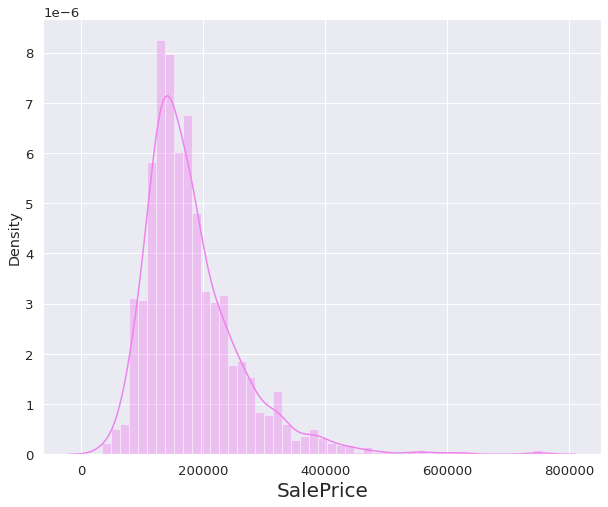

In [6]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.distplot(df_train['SalePrice'], color='violet')
plt.xlabel('SalePrice', fontsize=20)
print('Skew Dist:', df_train['SalePrice'].skew())
print('Kurtosis Dist:', df_train['SalePrice'].kurt())

Great, It seems that the minimum price is larger than zero, maning we won't have to deal with houses sold for zero or negative prices.
Also, we can see on the histogram that the distribution does not deviate from a normal distribution. This was expected as few people can afford very expensive houses. Let's deal with this distribution now.

House prices are tend to relevant with it's age and location.
Let's check the average 'YearBuilt' and 'MSZoning'.

In [7]:
grouped = df_train['YearBuilt'].groupby(df_train['MSZoning'])
print(grouped.mean())

MSZoning
C (all)    1924.100000
FV         2004.507692
RH         1945.687500
RL         1975.461338
RM         1943.256881
Name: YearBuilt, dtype: float64


The mean YearBuilt of this dataset is 1924. 

One thing is very interesting to note on the dates of construction of the houses according to the categories of MSZoning. Clearly, the FV (Floating Village Residential) category has the most recent average build year of all MSZoning categories. 

In [8]:
grouped = df_train['SalePrice'].groupby(df_train['MSZoning'])
print(grouped.mean())

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64


Now, we focus on the average sale price of a house according to its category in the MSZoning variable.
It would seem that we observe the same ranking as the previous comparison. Thus, the FV category would sell on average for more than $200k. 

We can hypothetically think that the selling price of a house depends on its year of construction. Let's look at it in more detail:

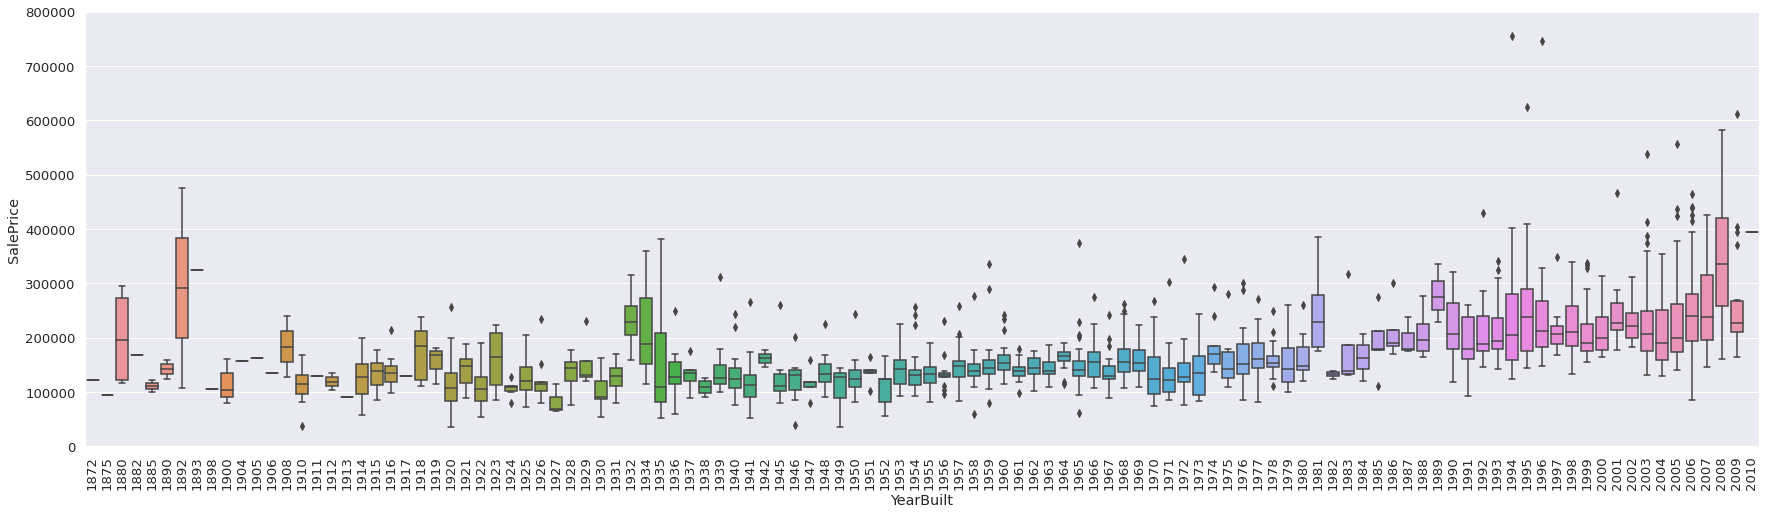

In [9]:
f, ax = plt.subplots(figsize=(30, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=df_train)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Although it's not a strong tendency, seems that 'SalePrice' is more prone to spend more money in recent houses than in old ones.

### 'SalePrice' correlation matrix

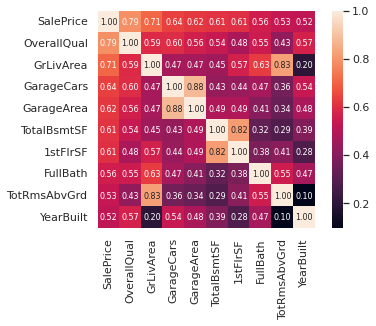

In [10]:
#saleprice correlation matrix
corrmat = df_train.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to the Saleprice correlation matrix, these 10 variables are the most correlated with 'SalePrice'. Thoughts on this:

*   'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 
'SalePrice'.
*   'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, the number of cars that fit into the garage is a consequence of the garage area. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is slightly higher).
*   'TotalBsmtSF' and '1stFloor' also seem to be twins. Let's keep here 'TotalBsmtSF'.
*   'FullBath': hard to think the 'SalePrice' can partially be defined by this variable.
*   'TotRmsAbvGrd' and 'GrLivArea', twins again. Keeping 'GrLivArea' cause of the higher correlation with 'SalePrice'.
*   It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. 

### Scatter plots between 'SalePrice' and correlated variables

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


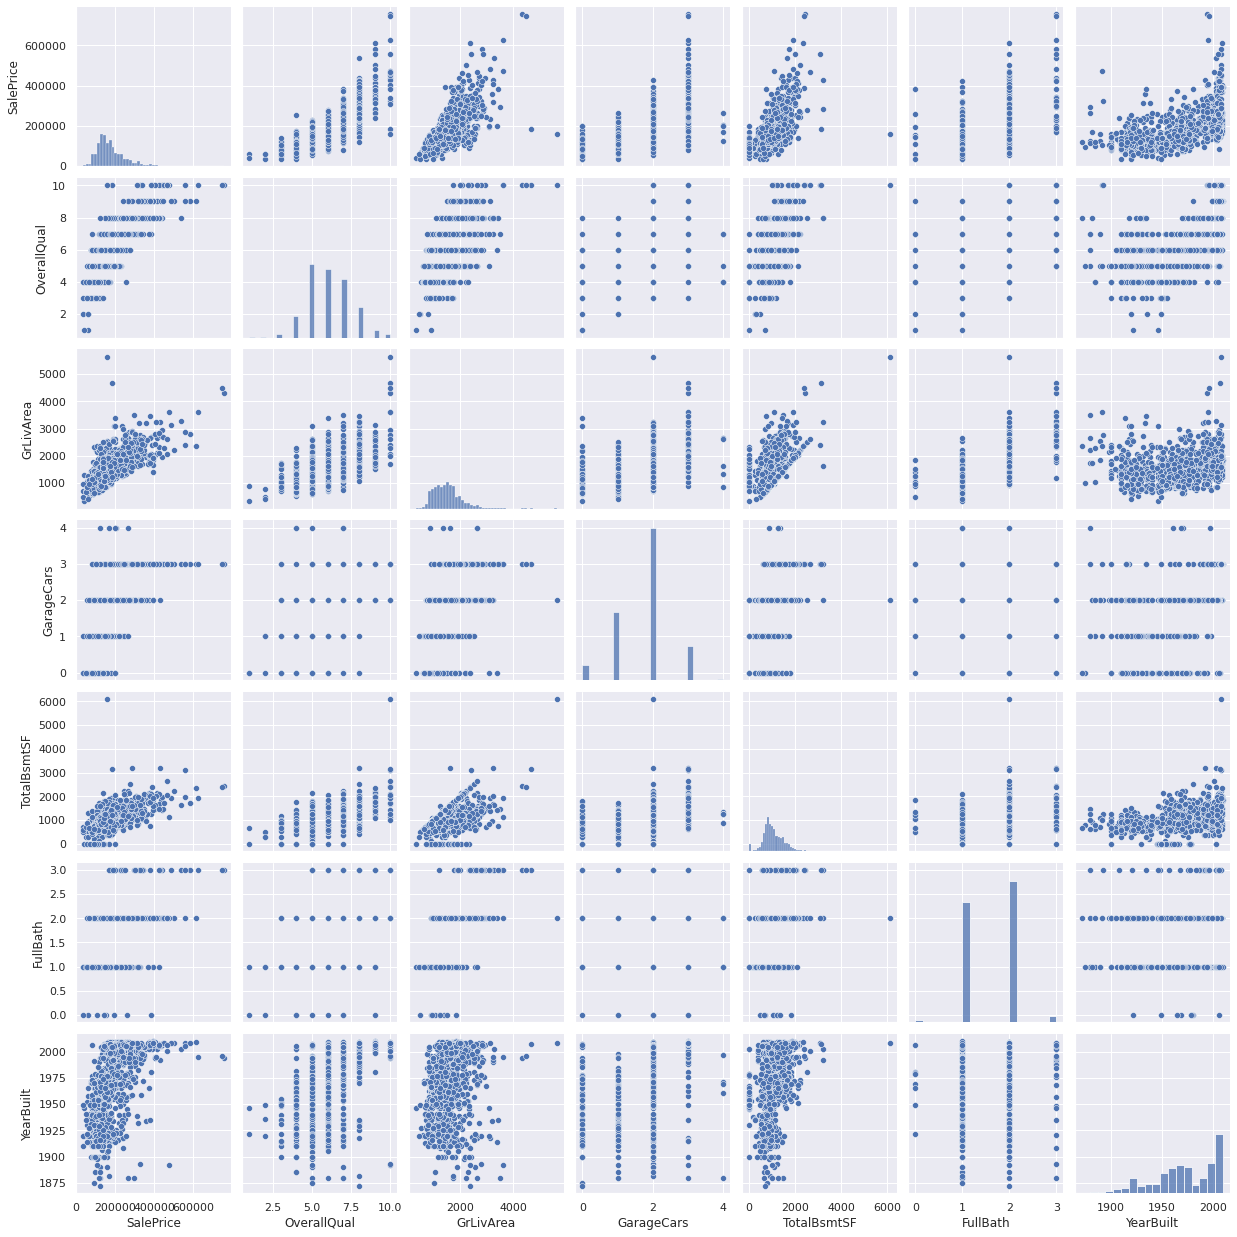

In [11]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

The figure 'TotalBsmtSF'/'GrLiveArea' is very interesting. In this figure, the dots are drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).


Let's move forward to what's missing: missing data!


### Missing Data

In [12]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


The [missing data handling](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python?scriptVersionId=19403046&cellId=42) (part 4.) discribed by [Pedro Marcelino](https://www.kaggle.com/pmarcelino) on his notebook is a very simple and complete explanation of how we can manage missing data on this dataset. For now, I'll do as his description but I may have to upgrade this part later.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [13]:
df_train_withoutMissingData = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train_withoutMissingData = df_train_withoutMissingData.drop(df_train_withoutMissingData.loc[df_train_withoutMissingData['Electrical'].isnull()].index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [14]:
df_test_withoutMissingData = df_test.drop((missing_data[missing_data['Total'] > 1]).index,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [15]:
#missing data
total = df_train_withoutMissingData.isnull().sum().sort_values(ascending=False)
percent = (df_train_withoutMissingData.isnull().sum()/df_train_withoutMissingData.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Id,0,0.0
Fireplaces,0,0.0
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
LowQualFinSF,0,0.0


In [16]:
df_train_withoutMissingData.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [17]:
print("Shape of df_train:", df_train_withoutMissingData.shape)
print("Shape of df_test:", df_test_withoutMissingData.shape)

Shape of df_train: (1459, 63)
Shape of df_test: (1459, 62)


### Feature engeneering

#### Transforming some numerical variables that are really categorical

In [18]:
def num2cat(df):
  #MSSubClass=The building class
  df['MSSubClass'] = df['MSSubClass'].apply(str)

  #Changing Overall* into a categorical variable
  df['OverallCond'] = df['OverallCond'].astype(str)
  df['OverallQual'] = df['OverallQual'].apply(str)

  #Year and month sold are transformed into categorical features.
  df['YrSold'] = df['YrSold'].astype(str)
  df['MoSold'] = df['MoSold'].astype(str)

  return df

In [19]:
df_train_featureEngeneered = num2cat(df_train_withoutMissingData)
df_test_featureEngeneered = num2cat(df_test_withoutMissingData)

#### Adding one more important feature

In [20]:
def total_sqfootage(df):
  df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
  return df

In [21]:
df_train_featureEngeneered = total_sqfootage(df_train_featureEngeneered)
df_test_featureEngeneered = total_sqfootage(df_test_featureEngeneered)

### Defining Cleaned and shaped dataset

In [22]:
df_train_cleaned = df_train_featureEngeneered
df_test_cleaned = df_test_featureEngeneered

In [23]:
print("Shape of df_train:", df_train_cleaned.shape)
print("Shape of df_test:", df_test_cleaned.shape)

Shape of df_train: (1459, 64)
Shape of df_test: (1459, 63)


### Target

In [24]:
target = df_train_cleaned["SalePrice"]
df_train_cleaned.drop(["SalePrice"], axis=1, inplace=True)

In [25]:
target = np.log1p(target)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'SalePrice')

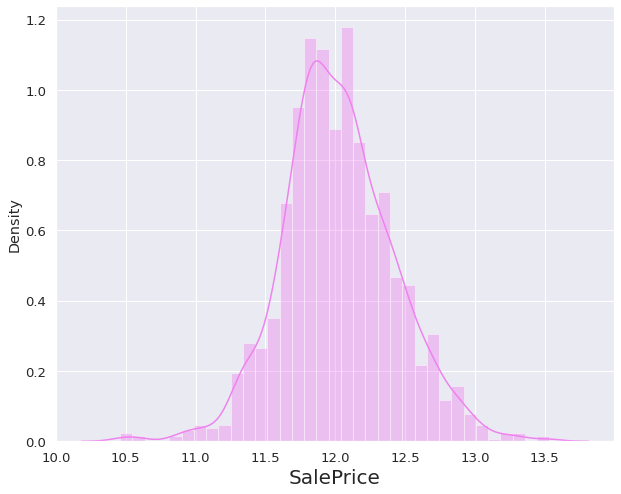

In [26]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.distplot(target, color='violet')
plt.xlabel('SalePrice', fontsize=20)

Great, we now have a gaussian distribution.


### Data pipeline to transform numerical and categorical data

In [27]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler()),
    ])

In [28]:
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown = 'ignore')),
    ])

In [29]:
num_attribs = [col for col in df_train_cleaned.columns if (df_train_cleaned[col].dtype == 'int64' or df_train_cleaned[col].dtype == 'float64') and (col !='Id')]
cat_attribs = [col for col in df_train_cleaned.columns if (df_train_cleaned[col].dtype == 'object')]

In [30]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)]
    )

In [31]:
df_train_piped = full_pipeline.fit_transform(df_train_cleaned)
df_test_piped = full_pipeline.transform(df_test_cleaned)

In [32]:
df_train_piped

<1459x267 sparse matrix of type '<class 'numpy.float64'>'
	with 90458 stored elements in Compressed Sparse Row format>

In [33]:
print("Shape of df_train:", df_train_piped.shape)
print("Shape of df_test:", df_test_piped.shape)

Shape of df_train: (1459, 267)
Shape of df_test: (1459, 267)


## Baseline

In [34]:
dm_reg = DummyRegressor()

dm_reg.fit(df_train_piped, target)
predictions = np.exp(dm_reg.predict(df_test_piped))

output = pd.DataFrame({'Id': df_test.Id, 'SalePrice': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


#Modeling

In [35]:
pip install catboost

In [36]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingRegressor

### Define a cross validation strategy

We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation

In [169]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train_piped)
    rmse = np.sqrt(-cross_val_score(model, df_train_piped, target, scoring="neg_mean_squared_error", cv=kf))
    return(rmse)

### LASSO Regression :
This model may be very sensitive to outliers. So we need to make it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [170]:
lasso = Lasso(alpha =0.0005, random_state=1)

### Elastic Net Regression :
again made robust to outliers

In [171]:
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

### Kernel Ridge Regression :

In [172]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

### Gradient Boosting Regression :
With huber loss that makes it robust to outliers

In [173]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

### XGBoost :

In [174]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

### LightGBM :

In [175]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

### Cat Boost Regressor

In [176]:
catb = CatBoostRegressor(silent=True)

### Random Forest Regressor

In [177]:
rfr = RandomForestRegressor()

### Support Vector Regression


In [178]:
svr = SVR()

### Decision Tree Regressor

In [179]:
dtr = DecisionTreeRegressor()

## Base models scores
Let's see how these base models perform on the data by evaluating the cross-validation rmsle error

In [ ]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("KernelRidge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("GradientBoostingRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("XGBRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBMRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(catb)
print("CatBoostRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(rfr)
print("RandomForestRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(svr)
print("SVR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(dtr)
print("DecisionTreeRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

Lasso score: 0.1337 (0.0403)

ElasticNet score: 0.1337 (0.0401)

KernelRidge score: 0.1231 (0.0221)

GradientBoostingRegressor score: 0.1248 (0.0206)

XGBRegressor score: 0.1243 (0.0156)

LGBMRegressor score: 0.1216 (0.0181)

CatBoostRegressor score: 0.1206 (0.0173)

RandomForestRegressor score: 0.1431 (0.0181)

SVR score: 0.1437 (0.0222)

DecisionTreeRegressor score: 0.2018 (0.0268)



### Stacking models

#### Simplest Stacking approach : Averaging base models

We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

In [182]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models in the mix.

In [ ]:
averaged_models = AveragingModels(models = (ENet, model_xgb, lasso, KRR))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1238 (0.0276)



Wow ! It seems even the simplest stacking approach really improve the score . This encourages us to go further and explore a less simple stacking approch.

In [ ]:
averaged_models.fit(df_train_piped, target)
predictions = np.exp(averaged_models.predict(df_test_piped))

In [ ]:
output = pd.DataFrame({'Id': df_test.Id, 'SalePrice': predictions})
output.to_csv('my_submission_averagedModels.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Submitted this output, got a 0.12765 score.
It's already pretty good! Let's try to improve this score with different technics:

### Missing Data (Upgraded)

As a reminder, we previously removed all variables that had missing data except the 'Electrical' one.

In [119]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


The [missing data handling](https://www.kaggle.com/limyenwee/stacked-ensemble-models-top-3-on-leaderboard?scriptVersionId=90403458&cellId=6) discribed by [Yen Wee Lim](https://www.kaggle.com/limyenwee) on his notebook is a very good and gives a complete explanation of how we can manage missing data on this dataset.

Let's implement this method on our notebook.

Data are not always clean. We cannot just simply discard them either as that will cause a huge loss of information.

Imputation of missing data is therefore needed to preserves the data cases by replacing missing data with an estimated value based on other available information.

We will have to impute those missing values with the most sensable method by looking at them one at a time (a little overkill?).

We join our given training set and test data set together while we go through the process

In [120]:
full = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

**MSZoning** : Identifies the general zoning classification of the sale.  
       A	Agriculture  
       C	Commercial  
       FV	Floating Village Residential  
       I	Industrial  
       RH	Residential High Density  
       RL	Residential Low Density  
       RP	Residential Low Density Park   
       RM	Residential Medium Density  

,Neighborhood,MSZoning
455,IDOTRR,NaN
756,IDOTRR,NaN
790,IDOTRR,NaN
1444,Mitchel,NaN


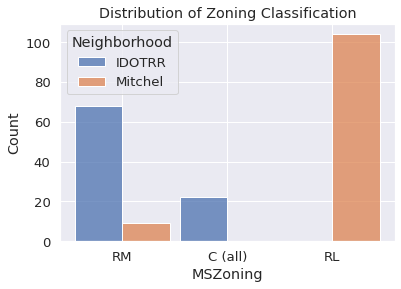

In [121]:
null = df_test[df_test['MSZoning'].isnull()][["Neighborhood","MSZoning"]]
display(null)
plot_data = pd.concat([full[full['Neighborhood'] == 'IDOTRR'],full[full['Neighborhood'] == 'Mitchel']],axis = 0)
sns.histplot(data = plot_data, x ='MSZoning', hue ='Neighborhood',multiple="dodge", shrink=.9)
plt.title("Distribution of Zoning Classification")
plt.show()

Since the general zoning classification usually depends on the neighborhood, we will impute the missing value by the mode in the area.

In [122]:
df_test.loc[(df_test['Neighborhood'] == 'IDOTRR') & (df_test['MSZoning'].isnull()), 'MSZoning'] = 'RM'
df_test.loc[(df_test['Neighborhood'] == 'Mitchel') & (df_test['MSZoning'].isnull()), 'MSZoning'] = 'RL'

**LotFrontage** : Linear feet of street connected to property  
We expect LotFrontage to be somewhat correlated with LotArea. Hence we will use LinearRegression to impute the missing values.   
We also manually filter out the outliers from the data.

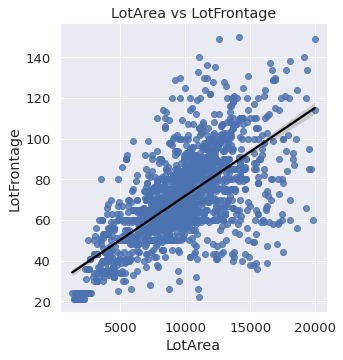

In [123]:
data = full[(~full['LotFrontage'].isnull()) & (full['LotFrontage'] <= 150) & (full['LotArea'] <= 20000)]
sns.lmplot(data=data,x="LotArea",y="LotFrontage", line_kws={'color': 'black'})
plt.ylabel("LotFrontage")
plt.xlabel("LotArea")
plt.title("LotArea vs LotFrontage")
plt.show()

In [124]:
area_vs_frontage = LinearRegression()
area_vs_frontage_X = data['LotArea'].values.reshape(-1, 1)
area_vs_frontage_y = data['LotFrontage'].values
area_vs_frontage.fit(area_vs_frontage_X,area_vs_frontage_y)
for table in [df_train, df_test]:
    table['LotFrontage'].fillna(area_vs_frontage.intercept_ + table['LotArea'] * area_vs_frontage.coef_[0] , inplace=True)

**Alley** : data description says NA means no alley access

In [125]:
for table in [df_train, df_test]:
    table['Alley'].fillna("None",inplace=True)

**Utilities** : Type of utilities available

In [126]:
full['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

Since there is only 1 data that uses NoSeWa and, we will surely fill the missing value in test set with AllPub.  
We will just drop the NoSeWa row in our training dataset since it is not found in the test set and will contribute to overfitting if left alone.

In [127]:
df_test['Utilities'].fillna("AllPub",inplace=True)

In [128]:
df_train.drop(df_train[df_train['Utilities'] == 'NoSeWa'].index, inplace = True)

**Exterior1st**: Exterior covering on house  
**Exterior2nd**: Exterior covering on house (if more than one material)  

There are more than 10 types of materials used in both the metrics. However, we can notice from the barplot that most of them are made of Vinyl. Hence, we will just fill the null values with the mode (Vinyl).

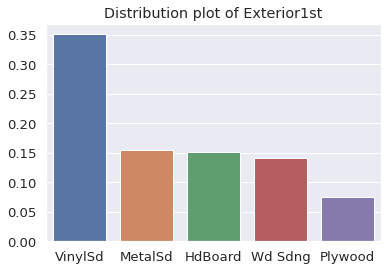

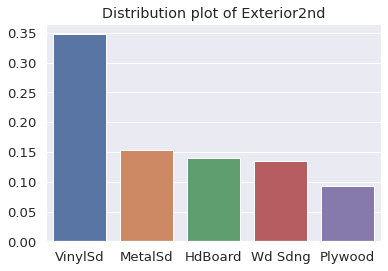

In [129]:
for metrics in ['Exterior1st','Exterior2nd']:
    table = full[metrics].value_counts(normalize=True).head()
    sns.barplot(x=table.index,y=table.values)
    plt.title("Distribution plot of "+metrics)
    plt.show()
    print("\n")

In [130]:
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(full['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(full['Exterior2nd'].mode()[0])

**MasVnrType** : data description says NA means no Masonry veneer.  
However we notice one data in test set with area but missing type.

In [131]:
df_test[(df_test['MasVnrType'].isnull()) & (df_test['MasVnrArea'].notnull())][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
1150,NaN,198.0


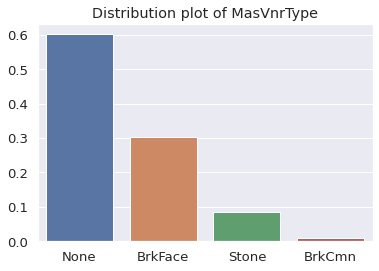

In [132]:
table = full['MasVnrType'].value_counts(normalize=True).head()
sns.barplot(x=table.index,y=table.values)
plt.title("Distribution plot of MasVnrType")
plt.show()
print("\n")

Since around 60% of our data do not have Masonry veneer. It will be used to fill the null value in row 2611 and also the other rows.

In [133]:
df_test['MasVnrType'][2611] = "BrkFace"
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(full['MasVnrType'].mode()[0])
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_train['MasVnrType'] = df_train['MasVnrType'].fillna(full['MasVnrType'].mode()[0])
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Basement Metrics** : data description says BsmtFinType1 measures the Type 1 finished square feet of basement.  
However, we can see a few data in test data set having basement metrics but "0" squarefeets

In [134]:
for basement_metrics_cols in ['BsmtExposure','BsmtCond','BsmtQual']:
    if len(full[(full[basement_metrics_cols].notnull()) & (full['BsmtFinType1'].isnull())]) > 0 :
        print("Present with BsmtFinType1 but undetected" + basement_metrics_cols)
        display(full[(full[basement_metrics_cols].notnull()) & (full['BsmtFinType1'].isnull())])

In [135]:
for basement_metrics_cols in ['BsmtExposure','BsmtCond','BsmtQual']:
    if len(full[(full[basement_metrics_cols].isnull()) & (full['BsmtFinType1'].notnull())]) > 0 :
        print("\nPresent with "+ basement_metrics_cols+" but BsmtFinType1 undetected" )
        display(full[(full[basement_metrics_cols].isnull()) & (full['BsmtFinType1'].notnull())])


Present with BsmtExposure but BsmtFinType1 undetected


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500.0
1487,1488,20,RL,73.0,8987,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,NaN
2348,2349,60,FV,81.0,10411,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,Partial,NaN



Present with BsmtCond but BsmtFinType1 undetected


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2040,2041,20,RL,103.0,16280,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,8,9,1976,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Ex,Ex,CBlock,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,GasA,Ex,Y,SBrkr,1671,0,0,1671,1.0,0.0,3,0,3,1,Ex,6,Typ,1,Gd,Attchd,1976.0,RFn,2.0,550.0,TA,TA,Y,280,90,0,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,NaN
2185,2186,20,RL,65.0,6500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,6,1976,1976,Hip,CompShg,HdBoard,Plywood,BrkFace,84.0,TA,TA,CBlock,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,GasA,TA,Y,SBrkr,1127,0,0,1127,0.0,1.0,1,1,3,1,TA,6,Typ,1,Po,Detchd,1991.0,Unf,2.0,480.0,TA,TA,Y,0,0,138,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,NaN
2524,2525,80,RL,72.0,9720,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SLvl,5,7,1977,1977,Gable,CompShg,Plywood,VinylSd,BrkFace,51.0,TA,TA,CBlock,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,GasA,TA,Y,SBrkr,1009,0,0,1009,0.0,0.0,2,0,3,1,TA,6,Typ,1,Fa,Detchd,1977.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,NaN



Present with BsmtQual but BsmtFinType1 undetected


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2217,2218,70,C (all),60.0,5280,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,7,1895,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Stone,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,GasA,Ex,N,SBrkr,825,536,0,1361,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1895.0,Unf,1.0,185.0,Fa,TA,Y,0,123,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,NaN
2218,2219,50,C (all),52.0,5150,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,1.5Fin,4,7,1910,2000,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,GasA,TA,N,FuseA,671,378,0,1049,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1910.0,Unf,1.0,195.0,Po,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,NaN


In [136]:
# We assume missing basement exposure of unfinished basement is "No".
df_train.loc[((df_train['BsmtExposure'].isnull()) & (df_train['BsmtFinType1'].notnull())), 'BsmtExposure'] = 'No'
df_test.loc[((df_test['BsmtExposure'].isnull()) & (df_test['BsmtFinType1'].notnull())), 'BsmtExposure'] = 'No'
# We impute missing basement condition with "mean" value of Typical.
df_test.loc[((df_test['BsmtCond'].isnull()) & (df_test['BsmtFinType1'].notnull())), 'BsmtCond'] = 'TA'
# We impute unfinished basement quality with "mean" value of Typical.
df_test.loc[((df_test['BsmtQual'].isnull()) & (df_test['BsmtFinType1'].notnull())), 'BsmtQual'] = 'TA'

There is one test data with missing square feet values. Let's check it out too.

In [137]:
df_test[df_test['BsmtFinSF1'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


This test data do not have basement. Hence, those squarefeets metrics should be filled in with 0.

In [138]:
for square_feet_metrics in ['TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1']:
    df_test[square_feet_metrics][2121] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


There is two test data with missing basement bathroom values. Let's check them out first too.

In [139]:
df_test[df_test['BsmtFullBath'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
728,2189,20,RL,123.0,47007,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


The two test data do not have basement. Hence, those bathroom amount in basement should also be filled in with 0.

In [140]:
for bathroom_metrics in ['BsmtFullBath','BsmtHalfBath']:
    df_test[bathroom_metrics][2121] = 0
    df_test[bathroom_metrics][2189] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The other data are assumed to not have basements hence filling in None.

In [141]:
for table in [df_train,df_test]:
    table[table.columns[table.columns.str.contains('Bsmt')]] = table[table.columns[table.columns.str.contains('Bsmt')]].fillna("None")

In [142]:
for table in [df_train, df_test]:
  for i in ['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    table.loc[table[i] == 'None'] = 0

In [143]:
table[table.columns[table.columns.str.contains('Bsmt')]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,0.0,0.0
1,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,0.0,0.0
2,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,0.0,0.0
3,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,0.0,0.0
4,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,0.0,0.0
1455,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,0.0,0.0
1456,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,1.0,0.0
1457,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,0.0,1.0


**Electrical, Functional and Kitchen Quality** These three metrics will too be filled with their "average" values.

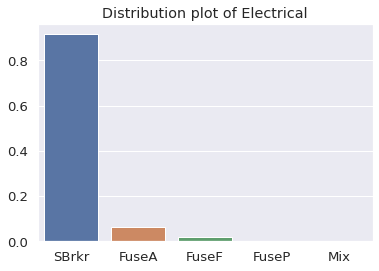

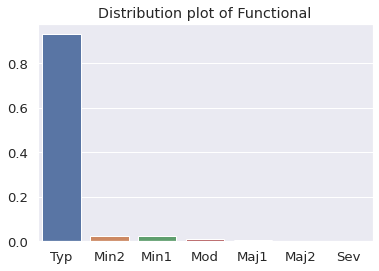

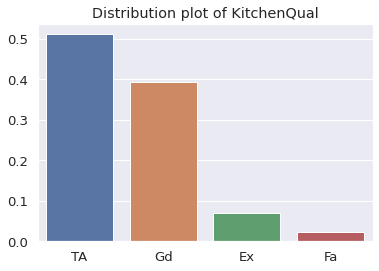

In [144]:
for metrics in ['Electrical','Functional','KitchenQual']:
    table = full[metrics].value_counts(normalize=True)
    sns.barplot(x=table.index,y=table.values)
    plt.title("Distribution plot of "+metrics)
    plt.show()
    print("\n")

These three metrics are safe to be filled with the mode values.

In [145]:
df_train['Electrical'].fillna('SBrkr',inplace=True)
df_test['Functional'].fillna('Typ',inplace=True)
df_test['KitchenQual'].fillna('TA',inplace=True)

In [146]:
full[full['GarageCars'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2576,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,NaN


Simililarly, this test data do not have a garage, filling GarageArea and GarageCars with 0.

In [147]:
df_test['GarageCars'].fillna(0,inplace=True)
df_test['GarageArea'].fillna(0,inplace=True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2489,2490,20,RL,85.0,13770,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,BrkFace,340.0,TA,TA,CBlock,TA,TA,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,GasA,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,1.0,303.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,NaN,Normal,NaN


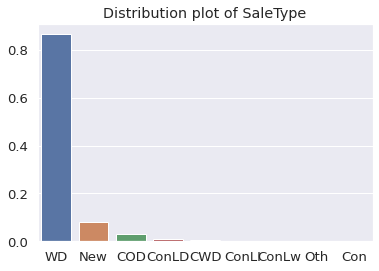

In [148]:
display(full[full['SaleType'].isnull()])
table = full['SaleType'].value_counts(normalize=True)
sns.barplot(x=table.index,y=table.values)
plt.title("Distribution plot of SaleType")
plt.show()

For the SaleType column, we will impute the missing data with the mode since the mode value is kinda high too.

In [149]:
df_test['SaleType'].fillna('WD',inplace=True)

It's now a good time to recheck all other remaining missing values.

In [150]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

,Total,Percent
PoolQC,1452,0.995202
MiscFeature,1405,0.962988
Fence,1178,0.807402
FireplaceQu,690,0.472927
GarageType,81,0.055517
GarageYrBlt,81,0.055517
GarageFinish,81,0.055517
GarageQual,81,0.055517
GarageCond,81,0.055517
KitchenAbvGr,0,0.000000


We do not have anything extra to infer these missing columns. Hence, we will treat them as "None" which is not having those items.

In [151]:
df_train['GarageYrBlt'].fillna(0,inplace=True)
df_test['GarageYrBlt'].fillna(0,inplace=True)
df_train.fillna("None", inplace=True)
df_test.fillna("None", inplace=True)

Let's check the total null value again.

In [152]:
df_train.isnull().sum().sum() + df_test.isnull().sum().sum()

0

In [153]:
df_train.index = df_train.index - 1

In [154]:
df_train_withoutMissingData = df_train
df_test_withoutMissingData = df_test

### Feature Ingeneering

#### Apply what has already been explained above

##### Transforming some numerical variables that are really categorical

In [155]:
df_train_featureEngeneered = num2cat(df_train_withoutMissingData)
df_test_featureEngeneered = num2cat(df_test_withoutMissingData)

##### Adding one more important feature

In [156]:
def total_sqfootage(df):
  df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
  return df

In [157]:
df_train_featureEngeneered = total_sqfootage(df_train_featureEngeneered)
df_test_featureEngeneered = total_sqfootage(df_test_featureEngeneered)

##### Defining Cleaned and shaped dataset

In [158]:
df_train_cleaned = df_train_featureEngeneered
df_test_cleaned = df_test_featureEngeneered

In [159]:
print("Shape of df_train:", df_train_cleaned.shape)
print("Shape of df_test:", df_test_cleaned.shape)

Shape of df_train: (1459, 82)
Shape of df_test: (1459, 81)


#### Target

In [160]:
target = df_train_cleaned["SalePrice"]
df_train_cleaned.drop(["SalePrice"], axis=1, inplace=True)

In [161]:
target = np.log1p(target)

### Data pipeline to transform numerical and categorical data

In [162]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler()),
    ])

In [163]:
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown = 'ignore')),
    ])

In [164]:
num_attribs = [col for col in df_train_cleaned.columns if (df_train_cleaned[col].dtype == 'int64' or df_train_cleaned[col].dtype == 'float64') and (col !='Id')]
cat_attribs = [col for col in df_train_cleaned.columns if (df_train_cleaned[col].dtype == 'object')]

In [165]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)]
    )

In [166]:
df_train_piped = full_pipeline.fit_transform(df_train_cleaned)
df_test_piped = full_pipeline.transform(df_test_cleaned)

In [167]:
print("Shape of df_train:", df_train_piped.shape)
print("Shape of df_test:", df_test_piped.shape)

Shape of df_train: (1459, 348)
Shape of df_test: (1459, 348)


### Modelling (upgraded)

In [180]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("KernelRidge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("GradientBoostingRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("XGBRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBMRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(catb)
print("CatBoostRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(rfr)
print("RandomForestRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(svr)
print("SVR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(dtr)
print("DecisionTreeRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

Lasso score: 0.1330 (0.0377)

ElasticNet score: 0.1330 (0.0375)

KernelRidge score: 0.1238 (0.0229)

GradientBoostingRegressor score: 0.1224 (0.0191)

XGBRegressor score: 0.1237 (0.0159)

LGBMRegressor score: 0.1243 (0.0178)

CatBoostRegressor score: 0.1190 (0.0183)

RandomForestRegressor score: 0.1443 (0.0186)

SVR score: 0.1423 (0.0223)

DecisionTreeRegressor score: 0.2037 (0.0222)



### Stacking models

We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models in the mix.

In [183]:
averaged_models = AveragingModels(models = (ENet, model_xgb, lasso, KRR))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1236 (0.0268)



In [184]:
averaged_models.fit(df_train_piped, target)
predictions = np.exp(averaged_models.predict(df_test_piped))

In [185]:
output = pd.DataFrame({'Id': df_test.Id, 'SalePrice': predictions})
output.to_csv('my_submission_averagedModels_updated_with_filled_missingData.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Feature Selection

Feature selection is a simple way to reduce redundant and irrelevant data from our dataset and some of them contribute close to nothing.
Removing the irrelevant data actually improves learning accuracy and greatly reduces the computation time.

By removing redundant data, we can reduce the chance of our model overfitting to the data too.

There are some ways to perform features selection and some of which we surely studied before such as the Pearson’s Correlation and Analysis of Variance (ANOVA). In this notebook, we will utilize the mutual info regression to estimate the dependency of the variables with our target variable.

Mutual information is a non-negative value and it shows the dependency between the variables. Meaning a mutual information of 0 will be saying that both of the features are completely independent. Hence, it is a safe bet for us to remove them off. Note the other name of mutual information is information gain (you may have heard it before).

Mutual information measures the amount of information one can obtain from one random variable given another. Source : Data Mining: Practical Machine Learning Tools and Techniques, 4th edition, 2016.

In [187]:
from sklearn.feature_selection import mutual_info_regression

In [188]:
mi = mutual_info_regression(X=df_train_cleaned, y=target)
mi_df = pd.DataFrame(list(zip(df_train_cleaned.columns, mi)), columns=['Feature', 'Mutual Info'])
mi_df = mi_df.sort_values('Mutual Info', ascending=False)

ValueError: ignored

In [ ]:
low_mi_df = mi_df[abs(mi_df['Mutual Info']) == 0]
filter_feature = sorted(list(low_mi_df['Feature']))
print("Number of low correlated features dropped: " + str(len(filter_feature)))
df_train = df_train.drop(filter_feature, axis=1)
df_test = df_test.drop(filter_feature, axis=1)

<1459x267 sparse matrix of type '<class 'numpy.float64'>'
	with 90458 stored elements in Compressed Sparse Row format>

### Data pipeline to transform numerical and categorical data

In [ ]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown = 'ignore')),
    ])

In [ ]:
num_attribs = [col for col in df_train_cleaned.columns if (df_train_cleaned[col].dtype == 'int64' or df_train_cleaned[col].dtype == 'float64') and (col !='Id')]
cat_attribs = [col for col in df_train_cleaned.columns if (df_train_cleaned[col].dtype == 'object')]

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)]
    )

In [ ]:
df_train_piped = full_pipeline.fit_transform(df_train_cleaned)
df_test_piped = full_pipeline.transform(df_test_cleaned)

In [ ]:
print("Shape of df_train:", df_train_piped.shape)
print("Shape of df_test:", df_test_piped.shape)

Shape of df_train: (1459, 348)
Shape of df_test: (1459, 348)


### Modelling (upgraded)

In [ ]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("KernelRidge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("GradientBoostingRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("XGBRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBMRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(catb)
print("CatBoostRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(rfr)
print("RandomForestRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(svr)
print("SVR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(dtr)
print("DecisionTreeRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

Lasso score: 0.1330 (0.0377)

ElasticNet score: 0.1330 (0.0375)

KernelRidge score: 0.1238 (0.0229)

GradientBoostingRegressor score: 0.1224 (0.0191)

XGBRegressor score: 0.1237 (0.0159)

LGBMRegressor score: 0.1243 (0.0178)

CatBoostRegressor score: 0.1190 (0.0183)

RandomForestRegressor score: 0.1443 (0.0186)

SVR score: 0.1423 (0.0223)

DecisionTreeRegressor score: 0.2037 (0.0222)



Lasso score: 0.1337 (0.0403)

ElasticNet score: 0.1337 (0.0401)

KernelRidge score: 0.1231 (0.0221)

GradientBoostingRegressor score: 0.1248 (0.0206)

XGBRegressor score: 0.1243 (0.0156)

LGBMRegressor score: 0.1216 (0.0181)

CatBoostRegressor score: 0.1206 (0.0173)

RandomForestRegressor score: 0.1431 (0.0181)

SVR score: 0.1437 (0.0222)

DecisionTreeRegressor score: 0.2018 (0.0268)

### Stacking models

We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models in the mix.

In [ ]:
averaged_models = AveragingModels(models = (ENet, model_xgb, lasso, KRR))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1238 (0.0276)



In [ ]:
averaged_models.fit(df_train_piped, target)
predictions = np.exp(averaged_models.predict(df_test_piped))

In [ ]:
output = pd.DataFrame({'Id': df_test.Id, 'SalePrice': predictions})
output.to_csv('my_submission_averagedModels.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
def fill_NaN(df):
  df['Functional'] = df['Functional'].fillna('Typ')
  df["PoolQC"] = df["PoolQC"].fillna("None")
  df['MiscFeature'] = df['MiscFeature'].fillna("None")
  df["Alley"] = df["Alley"].fillna("None")
  df['Fence'] = df['Fence'].fillna("None")
  df['FireplaceQu'] = df['FireplaceQu'].fillna("None")
  df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
  for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
      df[col] = df[col].fillna('None')
  for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
      df[col] = df[col].fillna('None')
  df['Electrical'] = df['Electrical'].fillna("SBrkr")
  df['MSZoning'] = df['MSZoning'].fillna("None")
  df['Utilities'] = df['Utilities'].fillna("None")
  df['KitchenQual'] = df['KitchenQual'].fillna("TA")
  df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
  df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
  df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
  for col in ('GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
  for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea','BsmtUnfSF', 'TotalBsmtSF'):
    df[col] = df[col].fillna(0)
  return df

In [ ]:
#dealing with missing data
df_train = fill_NaN(df_train)
df_test = fill_NaN(df_test)

#### GridSearchCV CatBoostRegressor

In [ ]:
params = {'depth':[1, 2, 3, 4, 5, 10],
          'iterations':[100, 250, 500, 1000],
          'learning_rate':[0.005, 0.01, 0.03, 0.1],
          'l2_leaf_reg':[1, 3, 5, 10],
          'border_count':[5, 10, 20]}

grid = GridSearchCV(estimator=catb, param_grid=params, cv=3, n_jobs=-1, verbose=10)
grid.fit(df_train_cleaned, target)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


KeyboardInterrupt: ignored

In [ ]:
res = grid.best_params_
res

In [ ]:
catb_optimized = CatBoostRegressor(silent=True, border_count=20, depth=5, iterations=1000, l2_leaf_reg=1, learning_rate=0.03)

In [ ]:
score = rmsle_cv(catb_optimized)
print("CatBoostRegressor optimised by GridSearchCV score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

In [ ]:
catb_optimized.fit(df_train_piped, target)
predictions_catb_optimized = np.exp(catb_optimized.predict(df_test_piped))

In [ ]:
output = pd.DataFrame({'Id': df_test.Id, 'SalePrice': predictions_catb_optimized})
output.to_csv('my_submission_predictions_catb_optimized.csv', index=False)
print("Your submission was successfully saved!")